In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#loading the data
data = pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#check for NaN
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116d27e48>,
      dtype=object)

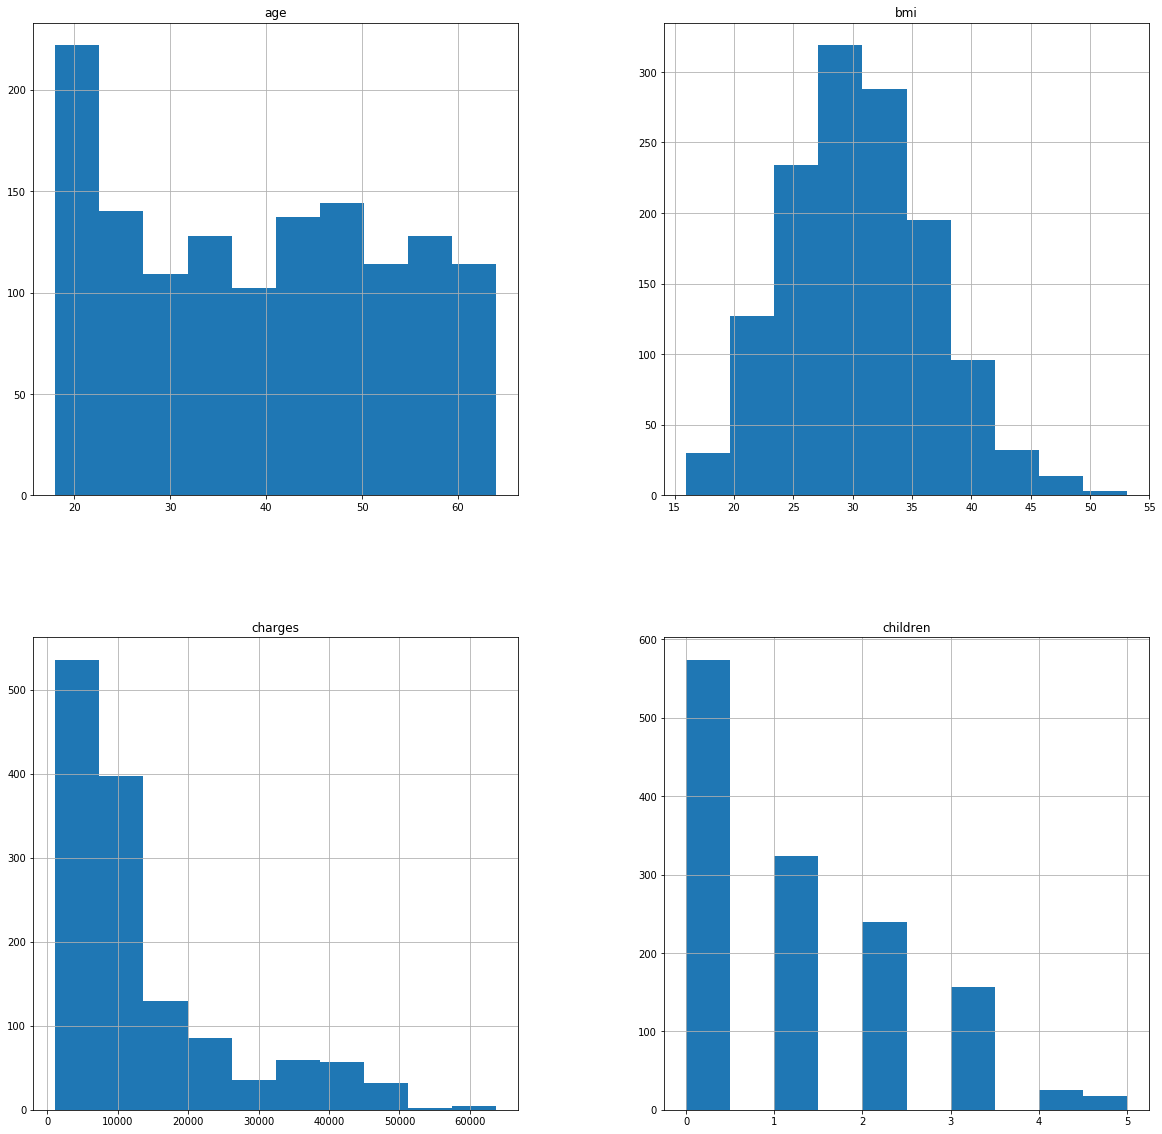

In [5]:
#data histogram
data.hist(figsize=(20,20))

In [6]:
#one hot encoding for categorical variables
data = pd.get_dummies(data=data)

In [7]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
x = data[['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest']]
y = data[['charges']]

In [9]:
# create scaler for x's and y
x_scaler = MinMaxScaler()
x_scaler.fit(x)
x = x_scaler.transform(x)

In [10]:
y_scaler = MinMaxScaler()
y_scaler.fit(y)
y = y_scaler.transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

In [21]:
model = Sequential()
model.add(Dense(100, input_shape=(X_train.shape[1],)))
model.add(Activation('linear'))
model.add(Dense(100))
model.add(Activation('linear'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adamax', metrics=['mse'])

In [22]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, shuffle=False)

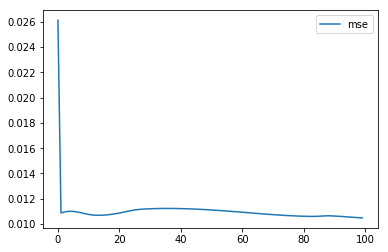

In [23]:
plt.plot(history.history['mean_squared_error'])
plt.legend(['mse'])
plt.show()

In [18]:
predictions = model.predict(X_test)

In [19]:
pred_ = y_scaler.inverse_transform(predictions)
real_ = y_scaler.inverse_transform(y_test)

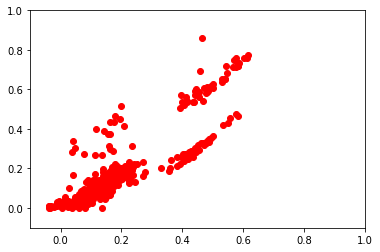

In [20]:
plt.plot(predictions ,y_test,'ro')
plt.ylim(ymin=-0.1, ymax=1)
plt.xlim(xmin=-0.1, xmax=1)
plt.show()